In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 100k shuffled data
with open('/content/drive/Shareddrives/SignLanguageData/combined_augmented_data_v3.pkl','rb') as f:
  X_train,y_train,X_test,y_test = pickle.load(f)

In [4]:
# #opening pickle file of augmented added data
# with open('../data/external/combined_augmented_data_v3.pkl','rb') as f:
#     X_train,y_train,X_test,y_test = pickle.load(f)

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
# y_train = label_binarizer.fit_transform(y_train)
# y_test = label_binarizer.fit_transform(y_test)

In [9]:
# Normalize the data
x_train = X_train / 255
x_test = X_test / 255

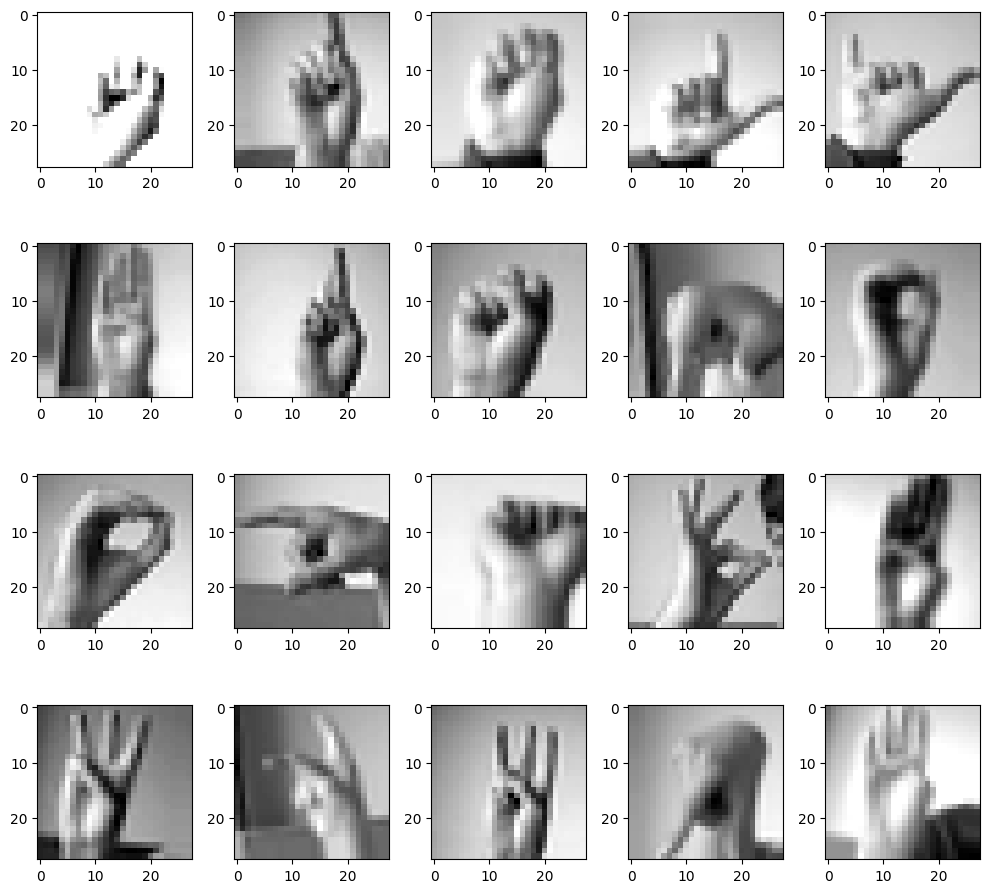

In [10]:
f, ax = plt.subplots(4,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [11]:
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (109820, 28, 28)
y_train shape: (109820,)
X_test shape: (28688, 28, 28)
y_test shape: (28688,)


In [ ]:
# Reshape X to be a 4D tensor for use in Keras
X = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
y= y_train.reshape((y_train.shape[0], 1))

In [ ]:
num_classes = len(list(map(int,list(np.unique(y_train)))))
num_classes

24

In [14]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [ ]:
# Extract features from X using the model
features = model.predict(X)

3432/3432 [==============================] - 28s 8ms/step


In [ ]:
#saving extracted Features into numpy
with open('../data/external/extracted_features_on_v3.npy', 'wb') as f:
    np.save(f,features)

### Feature selection for test set


In [12]:
# Reshape X to be a 4D tensor for use in Keras
X = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
y= y_test.reshape((y_test.shape[0], 1))

In [13]:
num_classes = len(list(map(int,list(np.unique(y_test)))))
num_classes

24

In [15]:
# Extract features from X using the model
features_test = model.predict(X)

897/897 [==============================] - 34s 38ms/step


In [16]:
#saving extracted Features into numpy
with open('/content/drive/Shareddrives/SignLanguageData/extracted_features_test_on_v3.npy', 'wb') as f:
    np.save(f,features_test)

In [17]:
# Load extracted features and labels
with open('/content/drive/Shareddrives/SignLanguageData/extracted_features_test_on_v3.npy', 'rb') as f:
    features_test = np.load(f)

In [18]:
#printing the shape of features
features_test.shape

(28688, 400)